# Text Preprocessing

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# %pip install ntlk
# import ntlk
from sklearn.feature_extraction.text import TfidfVectorizer

# for indonesian stemmer
# %pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# for indonesian stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#import wordcloud untuk visualisasi 
# %pip install wordcloud
from wordcloud import WordCloud

## Read Training dataset

In [158]:
# Read the dataset with the correct delimiter
df = pd.read_csv('indonesian-sentiment-twitter-dataset-labeled.csv', sep='\t')

# Split the "sentimen\tTweet" column into "sentiment" and "tweet" columns
df[['sentiment', 'tweet']] = df['sentimen\tTweet'].str.split('\t', n=1, expand=True)

# Drop the original column
df.drop('sentimen\tTweet', axis=1, inplace=True)

# Print the updated dataframe
df.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
4         0   

                                                                                                                tweet  
0             kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1  doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                         makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3         aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
4                                   barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping

### Drop Neutral Sentiment

In [160]:
df['sentiment'].astype(str)

df = df[df['sentiment'] != '0']
df.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Mengubah Text menjadi Lowercase

In [161]:
# df_lowercase = df_without_sentiment.copy()

#make dataframe view not truncated
pd.set_option('display.max_colwidth', None)

df_lowercase = df.copy()
df_lowercase['Processed Text'] = df_lowercase['tweet'].str.lower()
df_lowercase.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Menghilangkan Mention User
Mention di twitter biasanya diawali dengan karakter @, sehingga kita dapat menghilangkannya dengan menggunakan fungsi replace pada python. Contoh: @CantikaAbigail -> CantikaAbigail

In [162]:
df_remove_at = df_lowercase.copy()
df_remove_at['Processed Text'] = df_remove_at['Processed Text'].str.replace(r'@\w+', '', regex=True)

#display all columns without truncating
pd.set_option('display.max_colwidth', None)
df_remove_at.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Menghilangkan Hashtag
Hashtag di Twitter biasanya diawali dengan karakter #, sehingga kita dapat menghilangkannya dengan menggunakan fungsi replace pada python. Kita akan menghilangkan hashtag, namun tidak menghilangkan kata yang ada di dalam hashtag tersebut. Contoh: #SedihBanget -> SedihBanget

In [166]:
# remove hashtag but keep the word
df_remove_hashtag = df_remove_at.copy()
df_remove_hashtag['Processed Text'] = df_remove_hashtag['Processed Text'].str.replace(r'#', '', regex=True)
df_remove_hashtag.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Menghilangkan URL
URL di Twitter biasanya diawali dengan karakter http, sehingga kita dapat menghilangkannya dengan menggunakan fungsi replace pada python. Contoh: http://www.google.com -> www.google.com

In [165]:
df_remove_url = df_remove_hashtag.copy()
df_remove_url['Processed Text'] = df_remove_url['Processed Text'].str.replace(r'http\S+', '', regex=True)
df_remove_url.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Menghilangkan Emoji
Kebiasaan orang Indonesia yang suka menggunakan emoji dalam menulis tweet seperti :v :) :b dll. Kita dapat menghilangkannya dengan menggunakan fungsi replace dengan string kosong. Contoh: ':v' -> ''

In [167]:
df_remove_emoticon = df_remove_url.copy()
df_remove_emoticon['Processed Text'] = df_remove_emoticon['Processed Text'].str.replace(r'(?::|;|=)(?:-)?(?:\)|\(|D|P|v|V|p)', '', regex=True)
df_remove_emoticon.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Hilangkan semua karakter selain huruf dan angka

In [168]:
df_remove_non_alphanumeric = df_remove_emoticon.copy()
df_remove_non_alphanumeric['Processed Text'] = df_remove_non_alphanumeric['Processed Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df_remove_non_alphanumeric.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                           Processed Text  
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati   
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p   
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu  
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang   
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p

### Mengganti kata slang
Di Twitter banyak sekali slang yang digunakan, maka agar menggunakan pemrosesan, kita ganti kembali ke kata formalnya. Contoh: 'gak' -> 'tidak'. Terdapat dictionary yang didapatkan dari GitHub.


Indonesian Slang Dictionary Source: https://github.com/louisowen6/NLP_bahasa_resources/blob/master/combined_slang_words.txt

### Stemming dengan Dictionary Slang
Semenjak filenya berformat .txt, akan diubah menjadi dataframe agar memudahkan pengolahan

In [17]:
with open('language-resources/combined_slang_words.txt', 'r') as file:
    content = file.read()

slang_dict = eval(content)

slang_dict_df = pd.DataFrame(list(slang_dict.items()), columns=['slang_words', 'formal_words'])

slang_dict_df.head()

slang_words      formal_words
0           @                di
1        abis             habis
2          ad               ada
3        adlh            adalah
4       afaik  as far as i know

Selain itu, kita gunakan juga dictionary slang words dari https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv

In [18]:
slang_dict_df_2 = pd.read_csv('language-resources/kamus-alay-indonesia.csv',  header=0)
slang_dict_df_2.head()

slang    formal  In-dictionary  \
0     woww       wow              1   
1    aminn      amin              1   
2      met   selamat              1   
3   netaas   menetas              1   
4  keberpa  keberapa              0   

                                             context  category1 category2  \
0                                                wow   elongasi         0   
1  Selamat ulang tahun kakak tulus semoga panjang...   elongasi         0   
2  Met hari netaas kak!? Wish you all the best @t...  abreviasi         0   
3  Met hari netaas kak!? Wish you all the best @t...   afiksasi  elongasi   
4                           Birthday yg keberpa kak?  abreviasi         0   

  category3  
0         0  
1         0  
2         0  
3         0  
4         0

##### Hilangkan column yang tidak dipakai

In [19]:
slang_dict_df_2 = slang_dict_df_2[['slang', 'formal']]
slang_dict_df_2.columns = ['slang_words', 'formal_words']

slang_dict_df_2 = slang_dict_df_2.sort_values(by=['slang_words'])

slang_dict_df_2.head()

slang_words formal_words
7663            22nya   dua-duanya
1235            22nya   dua-duanya
4767       aaaaaaakkk           ah
11          aaaaahhhh           ah
468   aaaammmiiiinnnn         amin

### Berikan index secara alphabetic ke dictionary

In [20]:
slang_dict_df['word_index'] = slang_dict_df['slang_words'].str[0]
slang_dict_df_2['word_index'] = slang_dict_df_2['slang_words'].str[0]

#remove duplicate value on slang_words column
slang_dict_df_2 = slang_dict_df_2.drop_duplicates(subset=['slang_words'], keep='first')
slang_dict_df = slang_dict_df.drop_duplicates(subset=['slang_words'], keep='first')

slang_dict_df.head()

slang_words      formal_words word_index
0           @                di          @
1        abis             habis          a
2          ad               ada          a
3        adlh            adalah          a
4       afaik  as far as i know          a

### Gabungkan dictionary slang words

In [21]:
# Combine the two slang dictionaries into a single dataframe
combined_slang_dict = pd.concat([slang_dict_df, slang_dict_df_2])
combined_slang_dict = combined_slang_dict.drop_duplicates(subset=['slang_words'], keep='first')
combined_slang_dict.head()

slang_words      formal_words word_index
0           @                di          @
1        abis             habis          a
2          ad               ada          a
3        adlh            adalah          a
4       afaik  as far as i know          a

### Save slang dictionary

In [32]:
# save combined_slang_dict to csv
# combined_slang_dict.to_csv('language-resources/combined_slang_words.csv', index=False)

#### Mengganti kata slang dengan istilah formalnya
Setelah format file sudah sesuai, kita bisa mengecek setiap kolom tweet text agar mengganti istilah slang dengan istilah formal.

In [170]:
df_remove_slang_words = df_remove_non_alphanumeric.copy()

# Iterate through each word in df_remove_slang_words
for index, row in df_remove_slang_words.iterrows():
    words = row['Processed Text'].split()
    new_words = []
    for word in words:
        word_index = word[0]
        slang_dict = combined_slang_dict.loc[combined_slang_dict['word_index'] == word_index]
        if not slang_dict.empty:
            formal_word = slang_dict.loc[slang_dict['slang_words'] == word, 'formal_words'].values
            if len(formal_word) > 0:
                new_words.append(formal_word[0])
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    df_remove_slang_words.at[index, 'Processed Text'] = ' '.join(new_words)

In [171]:
df_remove_slang_words.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                                        Processed Text  
0                              kita lanjutkan saja diam ini hingga kamu dan aku mengerti tidak semua kebersamaan harus melibatkan hati  
1                 doa rezeki tidak putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ini ialah pemberian kami kepada kamu p  
2                                                                    terima kasih loh nanti kita bagi hasil aku 99 9 sisanya buat kamu  
3                      aku tidak faham betul jenis orang malaysia yang tidak reti nak sangkut balik hose itu aku geli bodoh nak pegang  
5  cerita dia macam ini mamat ini hari-hari aku menampak keluar masuk cimb ceria saja tapi hari ini aku menjenguk muka dia masam aku p

### Menghilangkan angka

In [172]:
# remove numeric character
df_remove_numeric = df_remove_slang_words.copy()
df_remove_numeric['Processed Text'] = df_remove_numeric['Processed Text'].str.replace(r'\d+', '', regex=True)
df_remove_numeric.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                                        Processed Text  
0                              kita lanjutkan saja diam ini hingga kamu dan aku mengerti tidak semua kebersamaan harus melibatkan hati  
1                 doa rezeki tidak putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ini ialah pemberian kami kepada kamu p  
2                                                                       terima kasih loh nanti kita bagi hasil aku   sisanya buat kamu  
3                      aku tidak faham betul jenis orang malaysia yang tidak reti nak sangkut balik hose itu aku geli bodoh nak pegang  
5  cerita dia macam ini mamat ini hari-hari aku menampak keluar masuk cimb ceria saja tapi hari ini aku menjenguk muka dia masam aku p

### Menghilangkan emoticon
Biasanya di twitter banyak emoticon yang digunakan seperti 😀. Ini perlu kita hilangkan agar tidak mempengaruhi hasil analisis. Kita dapat menghilangkannya dengan menggunakan fungsi replace dengan string kosong. Contoh: '😀' -> ''

In [173]:
# remove emoji like 😁 and 😂 and all other emoji
df_remove_emoji = df_remove_numeric.copy()
df_remove_emoji['Processed Text'] = df_remove_emoji['Processed Text'].str.replace(r'[^\w\s,]', '', regex=True)
df_remove_emoji.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                                       Processed Text  
0                             kita lanjutkan saja diam ini hingga kamu dan aku mengerti tidak semua kebersamaan harus melibatkan hati  
1                doa rezeki tidak putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ini ialah pemberian kami kepada kamu p  
2                                                                      terima kasih loh nanti kita bagi hasil aku   sisanya buat kamu  
3                     aku tidak faham betul jenis orang malaysia yang tidak reti nak sangkut balik hose itu aku geli bodoh nak pegang  
5  cerita dia macam ini mamat ini harihari aku menampak keluar masuk cimb ceria saja tapi hari ini aku menjenguk muka dia masam aku p

### Menghilangkan Extra Space

In [174]:
# remove extra space
df_remove_extra_space = df_remove_emoji.copy()
df_remove_extra_space['Processed Text'] = df_remove_extra_space['Processed Text'].str.replace(r'\s+', ' ', regex=True)
df_remove_extra_space.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                                       Processed Text  
0                             kita lanjutkan saja diam ini hingga kamu dan aku mengerti tidak semua kebersamaan harus melibatkan hati  
1                doa rezeki tidak putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ini ialah pemberian kami kepada kamu p  
2                                                                        terima kasih loh nanti kita bagi hasil aku sisanya buat kamu  
3                     aku tidak faham betul jenis orang malaysia yang tidak reti nak sangkut balik hose itu aku geli bodoh nak pegang  
5  cerita dia macam ini mamat ini harihari aku menampak keluar masuk cimb ceria saja tapi hari ini aku menjenguk muka dia masam aku p

### Menghilangkan (Filtering) Stopword
Stopword merupakan kata yang sering muncul namun tidak memiliki makna yang signifikan. Contohnya, kata seperti 'yang', 'di', 'dan', 'ke', 'dari', 'ini', 'itu', 'ada', 'tapi', 'ya', 'atau', 'juga', 'untuk', dll. Kata ini dapat dihilangkan karena tidak memiliki makna yang signifikan

In [177]:
# remove stopword with sastrawi
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# Pre defined addtional stop words
additional_stopwords = ['aku', 'kamu', 'dia', 'kita', 'mereka', 'orang', 'yang', 'di', 'dan', 'ke', 'dari', 'ini', 'itu', 'ada', 'tapi', 'ya', 'atau', 'juga', 'untuk', 'lah', 'kan']

# Remove the stop words from the processed text
df_remove_stopword = df_remove_extra_space.copy()

for index, row in df_remove_stopword.iterrows():
    processed_text = stopword.remove(row['Processed Text'])
    processed_text = ' '.join([word for word in processed_text.split() if word not in additional_stopwords])
    df_remove_stopword.at[index, 'Processed Text'] = processed_text

df_remove_stopword.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                     Processed Text  
0                                  lanjutkan diam hingga mengerti semua kebersamaan melibatkan hati  
1  doa rezeki putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ialah pemberian kepada p  
2                                                               terima kasih loh hasil sisanya buat  
3                faham betul jenis malaysia tidak reti nak sangkut balik hose geli bodoh nak pegang  
5          cerita macam mamat harihari menampak keluar masuk cimb ceria hari menjenguk muka masam p

### Melakukan Lemmatization
Lemmatization adalah proses mengubah kata menjadi kata dasar. Tujuannya, agar kata mudah di proses. Contohnya, kata 'bermain' akan diubah menjadi 'main'. Hal ini dilakukan agar kata yang memiliki makna sama dapat dikelompokkan menjadi satu. Contohnya, kata 'main', 'bermain', 'bermainlah', 'bermainnya' akan menjadi satu kelompok kata 'main'. Lemmatization pada bahasa Indonesia dapat dilakukan dengan menggunakan library Sastrawi.

In [178]:
# perform lemmatization with sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

df_stemmed = df_remove_stopword.copy()

# Iterate through each word in df_stemmed
for index, row in df_stemmed.iterrows():
    df_stemmed.at[index, 'Processed Text'] = stemmer.stem(row['Processed Text'])

df_stemmed.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                Processed Text  
0                                                lanjut diam hingga erti semua sama libat hati  
1  doa rezeki putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ialah beri kepada p  
2                                                             terima kasih loh hasil sisa buat  
3            faham betul jenis malaysia tidak ret nak sangkut balik hose geli bodoh nak pegang  
5          cerita macam mamat harihari tampak keluar masuk cimb ceria hari jenguk muka masam p

### Menghilangkan data yang kosong

In [179]:
df_stemmed.isnull().values.sum()

0

In [180]:
df_stemmed = df_stemmed.dropna()

df_stemmed.isnull().values.sum()

0

### Menyimpan data Training yang sudah di Preprocessed

In [257]:
# Simpan data yang sudah dipreproses karena prosesnya cukup lama. jadi tidak usah diulang prosesnya
# df_stemmed.to_csv('training-data-labeled-preprocessed.csv', index=False)

In [268]:
#  df_stemmed.to_csv('2-label-training-data-preprocessed.csv', index=False)


### Melakukan Tokenization

In [183]:
#perform tokenization on df_stemmed
df_tokenized = df_stemmed.copy()

# Iterate through each word in df_tokenized
for index, row in df_tokenized.iterrows():
    df_tokenized.at[index, 'Processed Text'] = row['Processed Text'].split()

df_tokenized.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                                 Processed Text  
0                                                        [lanjut, diam, hingga, erti, semua, sama, libat, hati]  
1  [doa, rezeki, putus, inna, haa, zaa, larizquna, maa, lahu, min, nya, fadesungguhnya, ialah, beri, kepada, p]  
2                                                                       [terima, kasih, loh, hasil, sisa, buat]  
3              [faham, betul, jenis, malaysia, tidak, ret, nak, sangkut, balik, hose, geli, bodoh, nak, pegang]  
5            [cerita, macam, mamat, harihari, tampak, keluar, masuk, cimb, ceria, hari, jenguk, muka, masam, p]

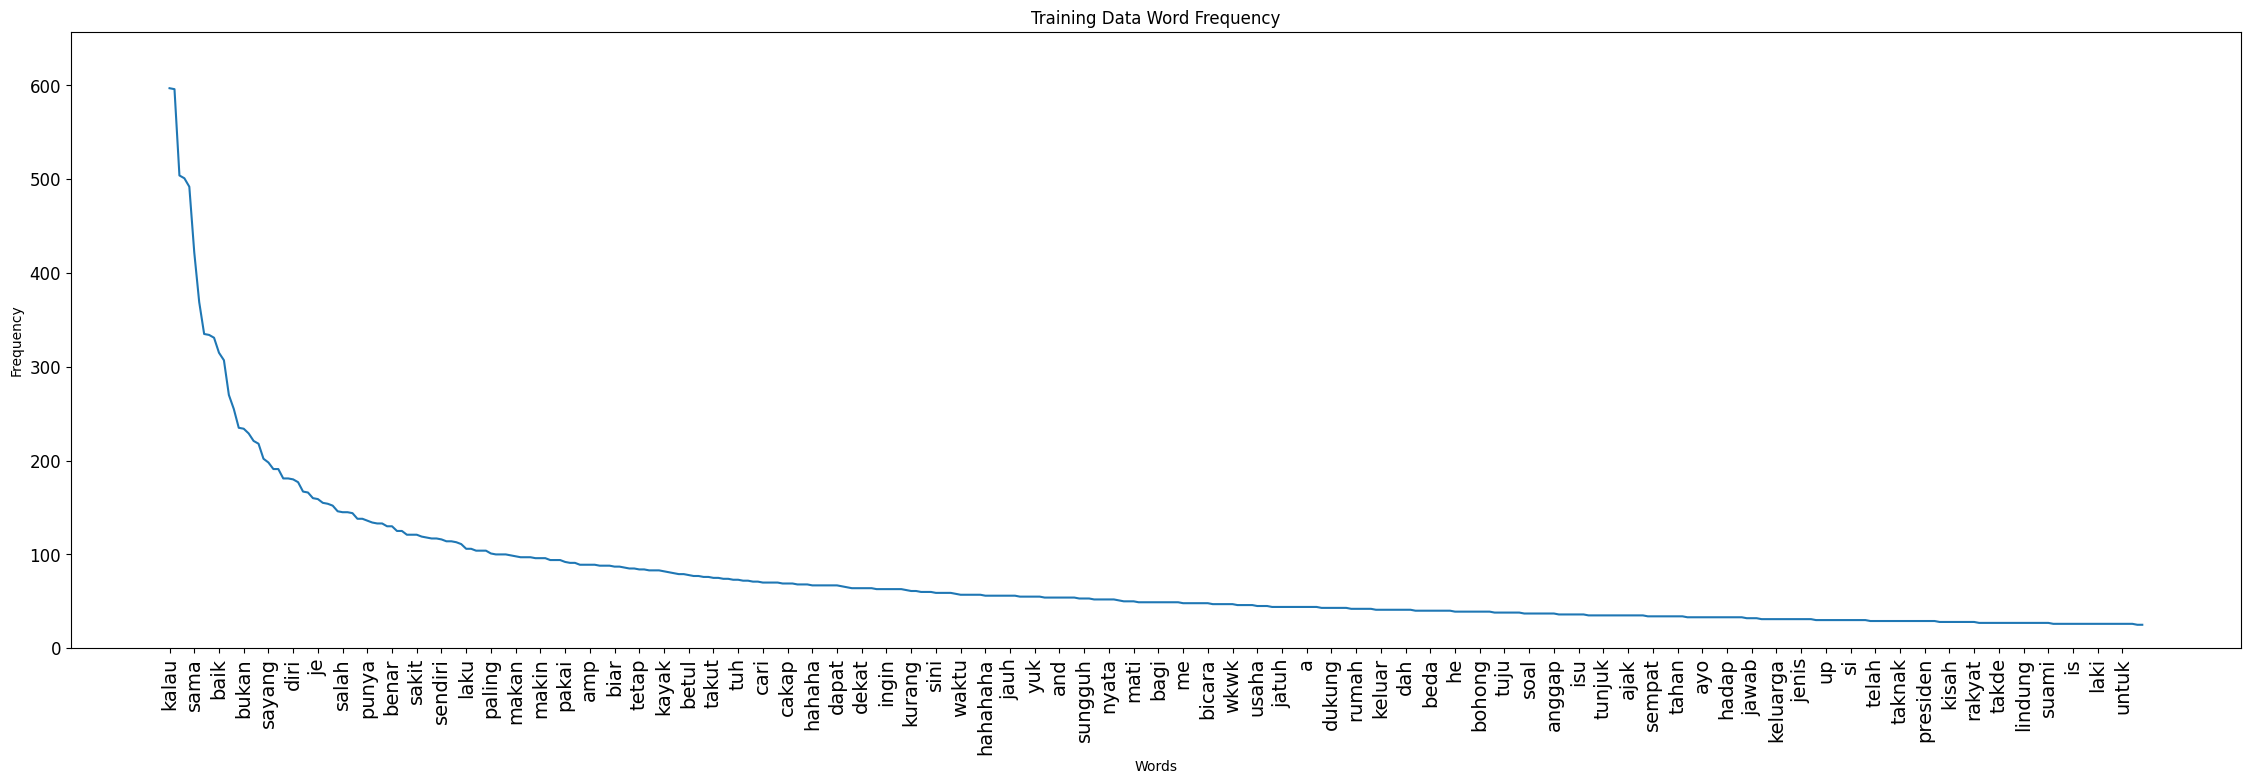

In [184]:
def visualize_word_frequency_with_lines(tokenized_column, num_words, title):
    # Concatenate all tokenized words into a single string
    all_words = ' '.join([' '.join(text) for text in tokenized_column])

    # Calculate word frequency
    freq = pd.Series(all_words.split()).value_counts()

    # Select the top N most frequent words
    freq_top = freq[:num_words]

    # Plot word frequency
    fig, ax = plt.subplots(figsize=(28, 8))
    freq_top.plot(kind='line', ax=ax, fontsize=12)

    # Set plot title and labels
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')

    # Customize x-axis tick positions and labels
    x_ticks = range(0, len(freq_top), 5)  # Set the stride value to 5 for spacing
    x_labels = freq_top.index[::5]  # Select labels with the same stride value
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, rotation=90, fontsize=14)

    # Adjust y-axis limits
    y_max = freq_top.max()
    ax.set_ylim(0, y_max + y_max * 0.1)  # Add some margin to accommodate the lines

    # Display the plot
    plt.show()

visualize_word_frequency_with_lines(df_tokenized['Processed Text'], num_words=400, title='Training Data Word Frequency')


Dari sini, kita akan memfilter kata yang berada di bawah 190 kata frekuensinya dan 30 kata paling sering dipakai

In [185]:
df_filter_freq = df_tokenized.copy()

# Convert lists in 'Processed Text' column to strings
df_filter_freq['Processed Text'] = df_filter_freq['Processed Text'].apply(lambda x: ' '.join(x))

# Delete the 100 least frequent words
rare_d = pd.Series(' '.join(df_filter_freq['Processed Text']).split()).value_counts()[-100:]
rare_d = list(rare_d.index)
df_filter_freq['Processed Text'] = df_filter_freq['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_d))

# Remove the most frequent words
freq_d = pd.Series(' '.join(df_filter_freq['Processed Text']).split()).value_counts()[:30]
freq_d = list(freq_d.index)
df_filter_freq['Processed Text'] = df_filter_freq['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_d))


In [186]:
df_filter_freq.head()

sentiment  \
0        -1   
1         1   
2         1   
3        -1   
5        -1   

                                                                                                                    tweet  \
0                 kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1      doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                             makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3             aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang    
5  cerita dia macam ni mamat ni hari2 aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p    

                                                                                Processed Text  
0                                                                lanjut diam hingga erti libat  
1  doa rezeki putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ialah beri kepada p  
2                                                                  terima kasih loh hasil sisa  
3                          faham betul jenis malaysia ret sangkut balik hose geli bodoh pegang  
5                     cerita mamat harihari tampak keluar masuk cimb ceria jenguk muka masam p

In [187]:
df_filter_freq[59:]

sentiment  \
90            1   
91            1   
92            1   
93           -1   
94            1   
...         ...   
10798        -1   
10800         1   
10802         1   
10803         1   
10804         1   

                                                                                                                                  tweet  \
90               temen temen yg ada di jatinangor dan sekitarnya bisa tolong dibeli ya jualan bapak ini beliau jual kain lap keset dsb    
91                                                                                        hahaa aku juga ga ngerti tadi tp asal jwb aja   
92              kelak jika aku menjadi orangtua yang akan kulakukan adalah meyakinkan anakku nak percaya sama ayah tidur siang itu men    
93                                                      yang apa kamu mengabulkan doa ku untuk klosdonecepatnya okey kalo itu mau kamu    
94                                                                                                aku terhibur hahahahahahahahahahahaha   
...                                                                                                                                 ...   
10798  Pelik tengok orang zaman sekarang ni dulu kemain beria tunjuk effort dekat kita last ii dia kongsi perasaan tu kat org lain jgk    
10800              Jangan membandingkan kehidupanmu dengan kehidupan orang lain karena setiap dari kita memiliki karunia masing masing    
10802               Apapun yg telah kamu lakukan apapun kesalahanmu kamu akan selalu menemukan kata maaf dalam hati seorang Ibu BOTKECE   
10803                                                                                3 cara untuk ingat semula apa yang kita dah hafal    
10804      Semoga Allah permudahkan urusan aku amp orang sekeliling aku yang tengah stress tak kisah pasal assignment ke kerja lain ke    

                                                                             Processed Text  
90         teman teman jatinangor sekitar tolong beli jual bapak beliau jual kain lap keset  
91                                                               hahaa erti tadi asal jawab  
92                         kelak orangtua akan laku yakin anak percaya ayah tidur siang men  
93                                                       kabul doa ku klosdonecepatnya okey  
94                                                           hibur hahahahahahahahahahahaha  
...                                                                                     ...  
10798  pelik jenguk zaman sekarang dulu main ria tunjuk effort dekat last ii kongsi asa kat  
10800                                banding hidup hidup karena milik karunia masing masing  
10802                              telah laku salah selalu temu kata maaf orang ibu botkece  
10803                                                                 cara ingat mula hafal  
10804                           moga mudah urus amp keliling tengah stres kisah pasal kerja  

[5419 rows x 3 columns]

In [188]:
text_lengths = df_filter_freq['Processed Text'].apply(len)
print(text_lengths)

#check of any text length is 0
print('Number of null texts: {}'.format(df_filter_freq['Processed Text'].isnull().sum()))

0        29
1        91
2        27
3        67
5        72
         ..
10798    84
10800    54
10802    56
10803    21
10804    59
Name: Processed Text, Length: 5478, dtype: int64
Number of null texts: 0


In [178]:
# df_filter_freq.to_csv('preprocessed-data/ppp-training-data-preprocessed.csv', index=False)

## Menggabungkan semua operasi preproses dalam satu fungsi
Agar preproses dapat mudah dilakukan terhadap dataset lainnya, kita akan definisikan fungsi yang memudahkan kita untuk melakukan semua operasi sekaligus

In [189]:
def text_preprocessing(df, slang_dict):
    # Menghitung jumlah tweet kosong
    empty_tweet_count = df['tweet'].isnull().sum()
    print(f"Jumlah Tweet Kosong: {empty_tweet_count}")

    # Menghapus tweet kosong
    df = df.dropna(subset=['tweet'])

    # Menghapus tweet null
    df = df[df['tweet'] != 'null']

    # Mengubah teks menjadi huruf kecil
    df['Processed Text'] = df['tweet'].str.lower()

    # Menghapus username Twitter (@someUsername)
    df['Processed Text'] = df['Processed Text'].str.replace(r'@\w+', '', regex=True)

    # Menghapus hashtag
    df['Processed Text'] = df['Processed Text'].str.replace(r'#', '', regex=True)

    # Menghapus URL
    df['Processed Text'] = df['Processed Text'].str.replace(r'http\S+', '', regex=True)

    # Menghapus emoji
    df['Processed Text'] = df['Processed Text'].str.replace(r'[^\w\s,]', '', regex=True)

    # Menghapus karakter non-alphanumeric
    df['Processed Text'] = df['Processed Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

    # Menghapus nilai numerik
    df['Processed Text'] = df['Processed Text'].str.replace(r'\d+', '', regex=True)

    # Menghapus spasi tambahan
    df['Processed Text'] = df['Processed Text'].str.replace(r'\s+', ' ', regex=True).str.strip()

    # Inisialisasi penghapus stopword
    stopword_factory = StopWordRemoverFactory()
    stopword = stopword_factory.create_stop_word_remover()

    # Stopword tambahan yang telah ditentukan
    additional_stopwords = ['aku', 'kamu', 'dia', 'kita', 'mereka', 'orang']

    # Menghapus stopword
    df['Processed Text'] = df['Processed Text'].apply(lambda text: ' '.join([word for word in stopword.remove(text).split() if word not in additional_stopwords]))

    # Inisialisasi stemmer
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()

    # Melakukan lemmatisasi
    df['Processed Text'] = df['Processed Text'].apply(stemmer.stem)

    # Tokenisasi teks yang telah diproses
    df['Processed Text'] = df['Processed Text'].apply(lambda text: text.split())

    # Mengganti kata slang dengan kata formal menggunakan kamus bahasa slang
    for index, row in df.iterrows():
        words = row['Processed Text']
        new_words = []
        for word in words:
            word_index = word[0]
            slang_dict_filtered = slang_dict.loc[slang_dict['word_index'] == word_index]
            if not slang_dict_filtered.empty:
                formal_word = slang_dict_filtered.loc[slang_dict_filtered['slang_words'] == word, 'formal_words'].values
                if len(formal_word) > 0:
                    new_words.append(formal_word[0])
                else:
                    new_words.append(word)
            else:
                new_words.append(word)
        df.at[index, 'Processed Text'] = new_words
    # df_filter_freq = df_tokenized.copy()

    return df


## Melakukan preproses pada data tidak berlabel/data testing

### Read data testing
Dari keseluruhan data, kami akan hanya mengambil 9000 data saja untuk mempercepat proses testing

In [190]:
# Read the dataset with the correct delimiter
testing_data = pd.read_csv('dataset/indonesian-sentiment-tweet-dataset-unlabeled.csv', sep='\t')

#make column name as tweet
testing_data.columns = ['tweet']

#Atur jumlah data testing yang ingin dipake di sini
testing_data = testing_data[:9000]

# Print the updated dataframe
testing_data.head()

tweet
0             kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati 
1  Doa rezeki tak putus Inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p 
2                                                         Makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu
3         Aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu Aku geli bodoh nak pegang 
4                                   Barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping

### Inisiasi Fungsi Preprocessing pada Data Testing

In [191]:
testing_data_preprocessed = text_preprocessing(df=testing_data, slang_dict=combined_slang_dict)

Jumlah Tweet Kosong: 0


In [192]:
# testing_data_preprocessed = pd.read_csv('preprocessed-data/testing-data-preprocessed.csv')
testing_data_preprocessed.head()

tweet  \
0             kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1  Doa rezeki tak putus Inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                         Makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3         Aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu Aku geli bodoh nak pegang    
4                                   Barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping    

                                                                                                        Processed Text  
0                                                         [lanjut, diam, hingga, kamu, erti, semua, sama, libat, hati]  
1  [doa, rezeki, tidak, putus, inna, haa, zaa, larizquna, maa, lahu, min, nya, fadesungguhnya, ialah, beri, kepada, p]  
2                                                                  [terima kasih, loh, nanti, bagi, hasil, sisa, buat]  
3         [tidak, faham, betul, jenis, malaysia, tidak, ret, nak, sangkut, balik, hose, itu, geli, bodoh, nak, pegang]  
4                                              [barusan, lihat, tulis, belakang, truk, rela, injek, kopling, shopping]

### Menampilkan Data Testing yang Telah Preprocessed

In [203]:
df_testing = testing_data_preprocessed.copy()

df_testing['Processed Text'] = df_testing['Processed Text'].apply(lambda x: ' '.join(x))


In [204]:
df_testing.head()

tweet  \
0             kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1  Doa rezeki tak putus Inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                         Makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3         Aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu Aku geli bodoh nak pegang    
4                                   Barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping    

                                                                                      Processed Text  
0                                                 lanjut diam hingga kamu erti semua sama libat hati  
1  doa rezeki tidak putus inna haa zaa larizquna maa lahu min nya fadesungguhnya ialah beri kepada p  
2                                                        terima kasih loh nanti bagi hasil sisa buat  
3        tidak faham betul jenis malaysia tidak ret nak sangkut balik hose itu geli bodoh nak pegang  
4                                      barusan lihat tulis belakang truk rela injek kopling shopping

### Menyimpan Data Testing yang Telah Preprocessed

In [ ]:
# Simpan data yang sudah dipreproses karena prosesnya cukup lama. jadi tidak usah diulang prosesnya
# testing_data_preprocessed.to_csv('testing-data-preprocessed.csv', index=False)

### Mengolah Data Tweet Ardhito Pramono
Data ini akan digunakan sebagai sasaran analysis sentiment pada mini riset kami.

#### Baca Tweet Pra dan Pasca Kejadian

In [210]:
tweet_pasca_kejadian = pd.read_csv('dataset/tweet-pasca-kejadian.csv', sep='delimiter', header=None)
#display dataframe full width
pd.set_option('display.max_colwidth', None)

tweet_pasca_kejadian.columns = ['tweet']
tweet_pasca_kejadian.head()

C:\Users\geema\AppData\Local\Temp\ipykernel_19304\1212210812.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweet_pasca_kejadian = pd.read_csv('dataset/tweet-pasca-kejadian.csv', sep='delimiter', header=None)


tweet
0                                 Iyaa lagi:)
1                       aku yang tidak peduli
2  RUMOR DI TWT KATANYA UDH PUNYA ANAK JUGAAA
3                   "Berdiam terlihat jomblo,
4                    Bergerak bikin melongo "

In [211]:
tweet_pra_kejadian = pd.read_csv('dataset/tweet-pra-kejadian.csv', sep='delimiter', header=None)
tweet_pra_kejadian.columns = ['tweet']
tweet_pra_kejadian.head()

C:\Users\geema\AppData\Local\Temp\ipykernel_19304\2641185642.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweet_pra_kejadian = pd.read_csv('dataset/tweet-pra-kejadian.csv', sep='delimiter', header=None)


tweet
0                                                                        komen
1  Nah gini dari pada lo cuma balesin tweet gue, langsung ikutan aja kompetisi
2                                                                      iya iya
3                                                           This is awesome :)
4                                                         Sini bagi bahagianya

### Preprocess Data Tweet Ardhito Pramono

In [212]:
preprocessed_tweet_pra_kejadian = text_preprocessing(df=tweet_pra_kejadian, slang_dict=combined_slang_dict)
preprocessed_tweet_pasca_kejadian = text_preprocessing(df=tweet_pasca_kejadian, slang_dict=combined_slang_dict)

Jumlah Tweet Kosong: 0


Jumlah Tweet Kosong: 0


In [213]:
preprocessed_tweet_pra_kejadian.head()

tweet  \
0                                                                        komen   
1  Nah gini dari pada lo cuma balesin tweet gue, langsung ikutan aja kompetisi   
2                                                                      iya iya   
3                                                           This is awesome :)   
4                                                         Sini bagi bahagianya   

                                                                         Processed Text  
0                                                                               [komen]  
1  [nah, gin, pada, kamu, cuma, membalas, tweet, saya, langsung, ikut, saja, kompetisi]  
2                                                                            [iya, iya]  
3                                                                   [this, is, awesome]  
4                                                                       [sini, bahagia]

In [214]:
preprocessed_tweet_pasca_kejadian.head()

tweet  \
0                                 Iyaa lagi:)   
1                       aku yang tidak peduli   
2  RUMOR DI TWT KATANYA UDH PUNYA ANAK JUGAAA   
3                   "Berdiam terlihat jomblo,   
4                    Bergerak bikin melongo "   

                                 Processed Text  
0                                         [iya]  
1                               [tidak, peduli]  
2  [rumor, twt, kata, sudah, punya, anak, juga]  
3              [diam, lihat, tidak punya pacar]  
4                         [gerak, bikin, longo]

#### Menyimpan Data Tweet Ardhito Pramono yang Telah Preprocessed

In [215]:
# store preprocessed data to csv
# preprocessed_tweet_pasca_kejadian.isnull().values.sum()
# preprocessed_tweet_pra_kejadian.to_csv('dataset/preprocessed-tweet-pra-kejadian.csv', index=False)
# preprocessed_tweet_pasca_kejadian.to_csv('dataset/preprocessed-tweet-pasca-kejadian.csv', index=False)


### Preprocess Tweet Ardhito Tambahan

In [216]:
tweet_pra_kejadian2 = pd.read_csv('dataset/tweet-pra-kejadian2.csv')    
tweet_pasca_kejadian2 = pd.read_csv('dataset/tweet-pasca-kejadian2.csv')    

tweet_pra_kejadian2.columns = ['tweet']
tweet_pasca_kejadian2.columns = ['tweet']

tweet_pra_kejadian2.head()

tweet
0                Akhirnya bisa nonton bang ardhito manggung lagi
1                            Wooww aku blm pernah nonton ardhito
2                                                 that's my baby
3  Akhirnya bisa ngrasain suasana gigs lagi setelah sekian lama 
4                          Akhirnya bisa nonton ardhito manggung

In [217]:
tweet_pasca_kejadian2.head()

tweet
0  "Ini hasil dari pengembangan kasus dan laporan dari masyarakat. Jadi, enggak ada polisi punya daftar. Itu bohong," kata Direktur Reserse Narkoba Polda Metro Jaya.
1                                                                                                                                   Bisa jadi sih, atau cepu tadi ya.
2                                                                                                 Klo nggak di list mungkun FF juga udh ditangkap dari tahun lalu kan
3                                                                                                                   polisi nyambi jd temen artis kan juga banyak bang
4                                                                                                                                        Di bandar nya ada cepu bang.

#### Hilangkan nilai yang kosong

In [218]:
tweet_pasca_kejadian2.isnull().values.sum()

1

In [219]:
#drop null value
tweet_pasca_kejadian2 = tweet_pasca_kejadian2.dropna()

tweet_pasca_kejadian2.isnull().values.sum()

0

In [220]:
tweet_pra_kejadian2.isnull().values.sum()

1

In [221]:
#drop null value
tweet_pra_kejadian2 = tweet_pra_kejadian2.dropna()

tweet_pra_kejadian2.isnull().values.sum()

0

#### Preprocess all the tweets

In [222]:
preprocessed_tweet_pasca_kejadian2 = text_preprocessing(df=tweet_pasca_kejadian2, slang_dict=combined_slang_dict)
preprocessed_tweet_pra_kejadian2 = text_preprocessing(df=tweet_pra_kejadian2, slang_dict=combined_slang_dict)

Jumlah Tweet Kosong: 0


Jumlah Tweet Kosong: 0


#### Tampilkan Hasil Preprocess

In [223]:
preprocessed_tweet_pasca_kejadian2.head()

tweet  \
0  "Ini hasil dari pengembangan kasus dan laporan dari masyarakat. Jadi, enggak ada polisi punya daftar. Itu bohong," kata Direktur Reserse Narkoba Polda Metro Jaya.   
1                                                                                                                                   Bisa jadi sih, atau cepu tadi ya.   
2                                                                                                 Klo nggak di list mungkun FF juga udh ditangkap dari tahun lalu kan   
3                                                                                                                   polisi nyambi jd temen artis kan juga banyak bang   
4                                                                                                                                        Di bandar nya ada cepu bang.   

                                                                                                                                                                     Processed Text  
0  [hasil, kembang, kasus, lapor, masyarakat, jadi, tidak, polisi, punya, daftar, bohong, kata, direktur, reserse, narkotika, psikotropika, dan obat terlarang, polda, metro, jaya]  
1                                                                                                                                                           [jadi, sih, cepu, tadi]  
2                                                                                                                  [kalau, di, list, mungkun, ff, sudah, tangkap, tahun, lalu, kan]  
3                                                                                                                           [polisi, nyambi, jadi, teman, artis, kan, banyak, bang]  
4                                                                                                                                                         [bandar, nya, cepu, bang]

In [224]:
preprocessed_tweet_pra_kejadian2.head()

tweet  \
0                Akhirnya bisa nonton bang ardhito manggung lagi   
1                            Wooww aku blm pernah nonton ardhito   
2                                                 that's my baby   
3  Akhirnya bisa ngrasain suasana gigs lagi setelah sekian lama    
4                          Akhirnya bisa nonton ardhito manggung   

                                         Processed Text  
0            [akhir, menonton, bang, ardhito, manggung]  
1             [wooww, belum, pernah, menonton, ardhito]  
2                                     [thats, my, baby]  
3  [akhir, merasai, suasana, gigs, telah, sekian, lama]  
4                  [akhir, menonton, ardhito, manggung]

In [225]:
cp_preprocessed_pra = preprocessed_tweet_pra_kejadian2.copy()
cp_preprocessed_pasca = preprocessed_tweet_pasca_kejadian2.copy()

# Convert lists in 'Processed Text' column to strings
cp_preprocessed_pra['Processed Text'] = cp_preprocessed_pra['Processed Text'].apply(lambda x: ' '.join(x))
cp_preprocessed_pasca['Processed Text'] = cp_preprocessed_pasca['Processed Text'].apply(lambda x: ' '.join(x))

# Remove top 10 rare words from preprocessed_tweet_pra_kejadian2
rare_d = pd.Series(' '.join(cp_preprocessed_pra['Processed Text']).split()).value_counts()[-10:]
rare_d = list(rare_d.index)
cp_preprocessed_pra['Processed Text'] = cp_preprocessed_pra['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_d))

# Remove top 10 rare words from preprocessed_tweet_pasca_kejadian2
rare_d = pd.Series(' '.join(cp_preprocessed_pasca['Processed Text']).split()).value_counts()[-10:]
rare_d = list(rare_d.index)
cp_preprocessed_pasca['Processed Text'] = cp_preprocessed_pasca['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_d))


#### Most Frequent Words

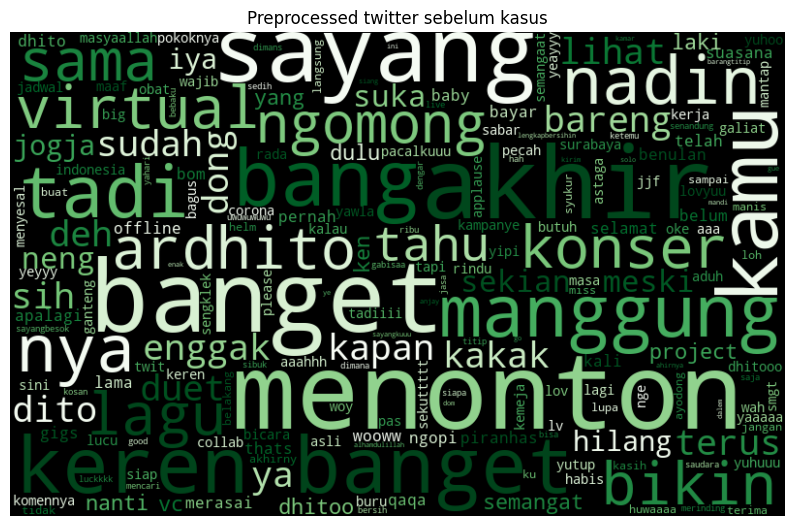

In [226]:
# wordcloud on cp_preprocessed_pra
all_words = ' '.join([text for text in cp_preprocessed_pra['Processed Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Greens').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Preprocessed twitter sebelum kasus')
plt.axis('off')
plt.show()

In [227]:
cp_preprocessed_pra.head()
# remove blank rows from cp_preprocessed_pra
cp_preprocessed_pra = cp_preprocessed_pra[cp_preprocessed_pra['Processed Text'] != '']
cp_preprocessed_pra.head()

tweet  \
0                Akhirnya bisa nonton bang ardhito manggung lagi   
1                            Wooww aku blm pernah nonton ardhito   
2                                                 that's my baby   
3  Akhirnya bisa ngrasain suasana gigs lagi setelah sekian lama    
4                          Akhirnya bisa nonton ardhito manggung   

                                 Processed Text  
0          akhir menonton bang ardhito manggung  
1           wooww belum pernah menonton ardhito  
2                                 thats my baby  
3  akhir merasai suasana gigs telah sekian lama  
4               akhir menonton ardhito manggung

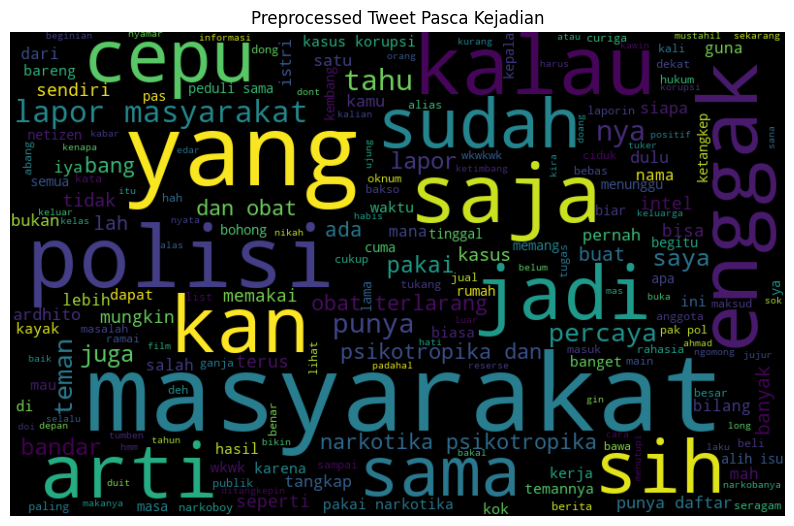

In [228]:
# wordcloud on cp_preprocessed_pasca
all_words = ' '.join([text for text in cp_preprocessed_pasca['Processed Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Preprocessed Tweet Pasca Kejadian')
plt.axis('off')
plt.show()

In [229]:
# cp_preprocessed_pasca.head()
# remove 4 most frequent words on cp_preprocessed_pra
freq = pd.Series(' '.join(cp_preprocessed_pra['Processed Text']).split()).value_counts()[:20]
freq = list(freq.index)
cp_preprocessed_pra['Processed Text'] = cp_preprocessed_pra['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# remove 4 most frequent words on cp_preprocessed_pasca
cp2_preprocessed_pasca = cp_preprocessed_pasca.copy()
freq = pd.Series(' '.join(cp2_preprocessed_pasca['Processed Text']).split()).value_counts()[:20]
freq = list(freq.index)
cp2_preprocessed_pasca['Processed Text'] = cp2_preprocessed_pasca['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


#### Remove additional stopwords

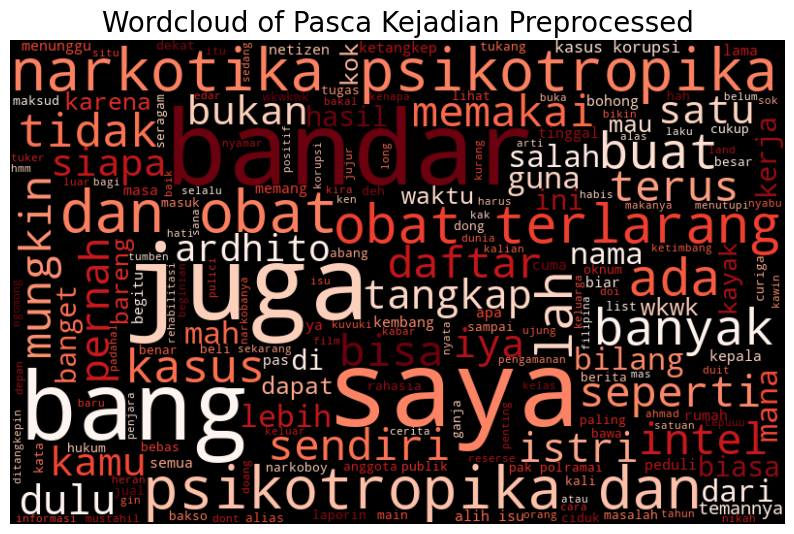

In [230]:
all_words = ' '.join([text for text in cp2_preprocessed_pasca['Processed Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Reds').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud of Pasca Kejadian Preprocessed', fontsize=20)
plt.axis('off')
plt.show()

#### Save the preprocessed data

In [276]:
# calculate cp2_preprocessed_pasca rows
cp2_preprocessed_pasca.shape[0]


199

In [232]:
# calculate cp2_preprocessed_pra rows
# cp2_preprocessed_pra.shape[0]

77

In [233]:
# save cp2_preprocessed_pasca as csv
# cp2_preprocessed_pasca.to_csv('preprocessed-data/cp2_revised_preprocessed_pasca.csv', index=1)
# cp_preprocessed_pra.to_csv('preprocessed-data/cp_preprocessed_pra.csv', index=1)

### Remove additional stopwords

In [234]:
add_remove_stopwords = ['saya', 'bang', 'juga', 'dan', 'ada']

# remove stopwords on cp_preprocessed_pra
# cp2_preprocessed_pra = cp_preprocessed_pra.copy()
# cp2_preprocessed_pra['Processed Text'] = cp3_preprocessed_pra['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in add_remove_stopwords))

# remove stopwords on cp_preprocessed_pasca
cp3_preprocessed_pasca = cp2_preprocessed_pasca.copy()
cp3_preprocessed_pasca['Processed Text'] = cp3_preprocessed_pasca['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in add_remove_stopwords))


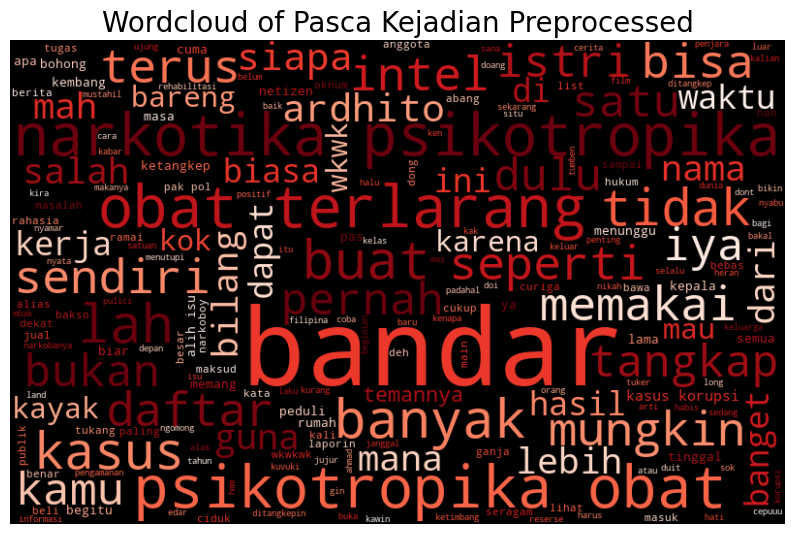

In [235]:
all_words = ' '.join([text for text in cp3_preprocessed_pasca['Processed Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Reds').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud of Pasca Kejadian Preprocessed', fontsize=20)
plt.axis('off')
plt.show()

In [236]:
cp2_preprocessed_pasca.head()

tweet  \
0  "Ini hasil dari pengembangan kasus dan laporan dari masyarakat. Jadi, enggak ada polisi punya daftar. Itu bohong," kata Direktur Reserse Narkoba Polda Metro Jaya.   
1                                                                                                                                   Bisa jadi sih, atau cepu tadi ya.   
2                                                                                                 Klo nggak di list mungkun FF juga udh ditangkap dari tahun lalu kan   
3                                                                                                                   polisi nyambi jd temen artis kan juga banyak bang   
4                                                                                                                                        Di bandar nya ada cepu bang.   

                                                                                                               Processed Text  
0  hasil kembang kasus tidak daftar bohong kata direktur reserse narkotika, psikotropika, dan obat terlarang polda metro jaya  
1                                                                                                                        tadi  
2                                                                                       di list mungkun ff tangkap tahun lalu  
3                                                                                                          nyambi banyak bang  
4                                                                                                                 bandar bang

In [237]:
# remove all symbols on cp2_preprocessed_pasca with space
cp2_preprocessed_pasca['Processed Text'] = cp2_preprocessed_pasca['Processed Text'].str.replace('[^\w\s]','')

In [238]:
# cp2_preprocessed_pasca.head(30)
#remove allnon alphanumeric characters
cp2_preprocessed_pasca['Processed Text'] = cp2_preprocessed_pasca['Processed Text'].str.replace('[^a-zA-Z0-9]',' ')


#full width table view
# pd.set_option('display.max_colwidth', None)

In [239]:
# cp2_preprocessed_pasca.to_csv('preprocessed-data/cp2_revised_preprocessed_pasca.csv', index=1)
cp3_preprocessed_pasca = text_preprocessing(cp2_preprocessed_pasca, combined_slang_dict)


Jumlah Tweet Kosong: 0


In [240]:
# cp3_preprocessed_pasca.head()
cp4_preprocessed_pasca = cp3_preprocessed_pasca.copy()

# Convert lists in 'Processed Text' column to strings
# cp4_preprocessed_pasca['Processed Text'] = cp_preprocessed_pasca['Processed Text'].apply(lambda x: ' '.join(x))
detokenized_text = cp4_preprocessed_pasca['Processed Text'].apply(lambda x: ' '.join(x))
print(detokenized_text)

# make detokenized_text free from any alphanumeric characters
detokenized_text = detokenized_text.str.replace('[^a-zA-Z0-9]',' ')

# replace cp4_preprocessed_pasca['Processed Text'] with detokenized_text
cp4_preprocessed_pasca['Processed Text'] = detokenized_text



0      hasil kembang kasus lapor masyarakat jadi tidak polisi punya daftar bohong kata direktur reserse narkotika, psikotropika, dan obat terlarang polda metro jaya
1                                                                                                                                                 jadi sih cepu tadi
2                                                                                                              kalau di list mungkun ff sudah tangkap tahun lalu kan
3                                                                                                                     polisi nyambi jadi teman artis kan banyak bang
4                                                                                                                                               bandar nya cepu bang
                                                                                   ...                                                                              
195       

In [241]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
cp4_preprocessed_pasca['Processed Text'] = cp4_preprocessed_pasca['Processed Text'].apply(lambda x: stopword.remove(x))

In [242]:
cp4_preprocessed_pasca.head()

tweet  \
0  "Ini hasil dari pengembangan kasus dan laporan dari masyarakat. Jadi, enggak ada polisi punya daftar. Itu bohong," kata Direktur Reserse Narkoba Polda Metro Jaya.   
1                                                                                                                                   Bisa jadi sih, atau cepu tadi ya.   
2                                                                                                 Klo nggak di list mungkun FF juga udh ditangkap dari tahun lalu kan   
3                                                                                                                   polisi nyambi jd temen artis kan juga banyak bang   
4                                                                                                                                        Di bandar nya ada cepu bang.   

                                                                                                                                        Processed Text  
0  hasil kembang kasus lapor masyarakat jadi polisi punya daftar bohong kata direktur reserse narkotika, psikotropika, obat terlarang polda metro jaya  
1                                                                                                                                   jadi sih cepu tadi  
2                                                                                                         kalau list mungkun ff tangkap tahun lalu kan  
3                                                                                                       polisi nyambi jadi teman artis kan banyak bang  
4                                                                                                                                 bandar nya cepu bang

In [243]:
freq = pd.Series(' '.join(cp4_preprocessed_pasca['Processed Text']).split()).value_counts()[:17]
freq = list(freq.index)

if 'cepu' in freq:
    freq.remove('cepu')

if 'polisi' in freq:
    freq.remove('polisi')

if 'bandar' in freq:
    freq.remove('bandar')

if 'pakai' in freq:
    freq.remove('pakai')
if 'narkotika' in freq:
    freq.remove('narkotika')
if 'psikotropika' in freq:
    freq.remove('psikotropika')

cp4_preprocessed_pasca['Processed Text'] = cp4_preprocessed_pasca['Processed Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


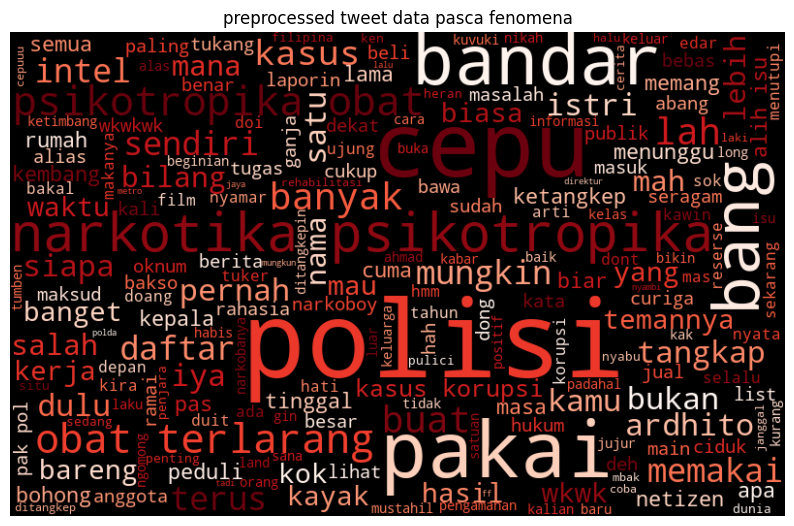

In [253]:
# Convert lists in 'Processed Text' column to strings
# cp_preprocessed_pasca['Processed Text'] = cp_preprocessed_pasca['Processed Text'].apply(lambda x: ' '.join(x))

# Create the word cloud
all_words_cp_preprocessed_pasca = ' '.join(cp4_preprocessed_pasca['Processed Text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Reds').generate(all_words_cp_preprocessed_pasca)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('preprocessed tweet data pasca fenomena')
plt.show()


In [245]:
# drop empty rows from cp4_preprocessed_pasca
cp4_preprocessed_pasca = cp4_preprocessed_pasca[cp4_preprocessed_pasca['Processed Text'] != '']

# Check the shape of cp4_preprocessed_pasca
shape = cp4_preprocessed_pasca.shape
print("Shape of cp4_preprocessed_pasca:", shape)


Shape of cp4_preprocessed_pasca: (193, 2)


In [246]:
# count empty row cp4_preprocessed_pasca
cp4_preprocessed_pasca[cp4_preprocessed_pasca['Processed Text'] == ''].shape[0]



0

In [247]:
# normalize spacing on cp4_preprocessed_pasca
cp4_preprocessed_pasca['Processed Text'] = cp4_preprocessed_pasca['Processed Text'].apply(lambda x: re.sub(' +', ' ', x))


In [248]:
#save cp4_preprocessed_pasca as csv
# cp4_preprocessed_pasca.to_csv('preprocessed-data/cp4_revised_preprocessed_pasca.csv', index=1)
read_cp4 = pd.read_csv('preprocessed-data/cp4_revised_preprocessed_pasca.csv', header=0)
read_cp4.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                tweet  \
0  "Ini hasil dari pengembangan kasus dan laporan dari masyarakat. Jadi, enggak ada polisi punya daftar. Itu bohong," kata Direktur Reserse Narkoba Polda Metro Jaya.   
1                                                                                                                                   Bisa jadi sih, atau cepu tadi ya.   
2                                                                                                 Klo nggak di list mungkun FF juga udh ditangkap dari tahun lalu kan   
3                                                                                                                   polisi nyambi jd temen artis kan juga banyak bang   
4                                                                                                                                        Di bandar nya ada cepu bang.   

                                                              Processed Text  
0  hasil kembang polisi daftar bohong kata direktur reserse polda metro jaya  
1                                                                  cepu tadi  
2                                         list mungkun ff tangkap tahun lalu  
3                                                              polisi nyambi  
4                                                                bandar cepu

stopwords_additional = ['sih', 'sama', 'sudah', ]

## Data Visualization and Analysis

### Visualisasi Kata dari dataset training

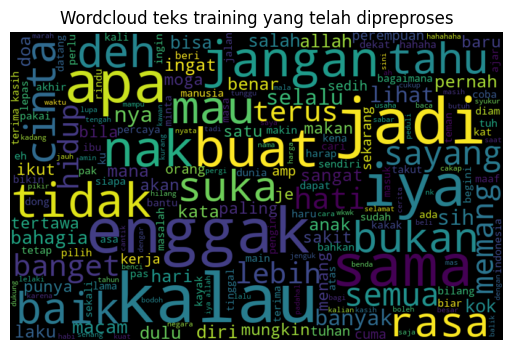

In [254]:
all_words = ' '.join([' '.join(text) for text in df_tokenized['Processed Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 4))
plt.title('Wordcloud teks training yang telah dipreproses')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### Visualisasi frekuensi kata dari setiap sentiment di training dataset

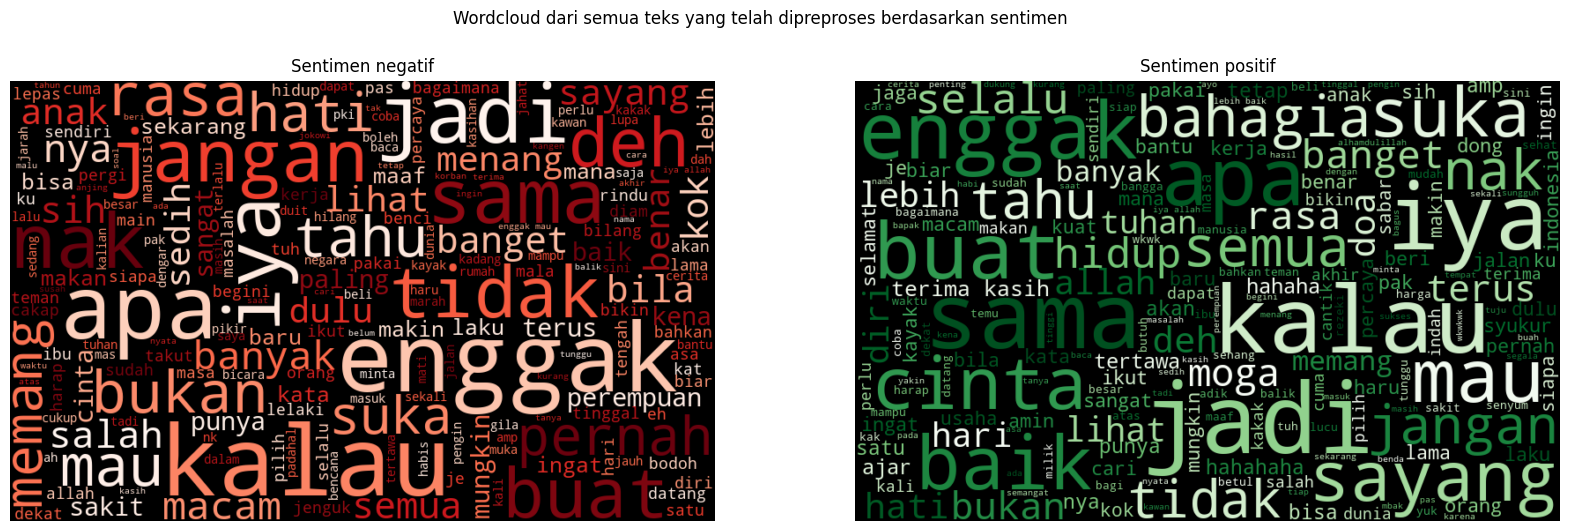

In [252]:
df_tokenized['sentiment'] = df_tokenized['sentiment'].astype(int)

# Create word clouds for each sentiment class and display them side by side. class with sentiment value -1 is negative (display the wordcloud red themed) and class with sentiment value 1 is positive (display the wordcloud green themed) and class with sentiment value 0 is neutral (display the wordcloud blue themed)
df_tokenized_negative = df_tokenized.loc[df_tokenized['sentiment'] == -1]
df_tokenized_positive = df_tokenized.loc[df_tokenized['sentiment'] == 1]

all_words_negative = ' '.join([' '.join(text) for text in df_tokenized_negative['Processed Text']])
all_words_positive = ' '.join([' '.join(text) for text in df_tokenized_positive['Processed Text']])

wordcloud_negative = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Reds').generate(all_words_negative)
wordcloud_positive = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Greens').generate(all_words_positive)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Wordcloud dari semua teks yang telah dipreproses berdasarkan sentimen')
ax2.imshow(wordcloud_positive, interpolation="bilinear")
ax2.set_title('Sentimen positif')
ax2.axis('off')
ax1.imshow(wordcloud_negative, interpolation="bilinear")
ax1.set_title('Sentimen negatif')
ax1.axis('off')
plt.show()



#### Jumlah kata dari setiap kelas sentiment di Data Training

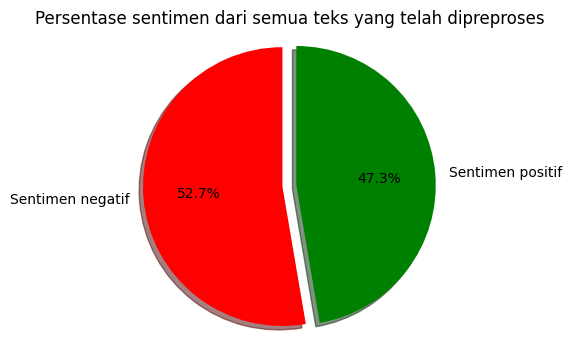

In [256]:
labels = ['Sentimen negatif',  'Sentimen positif']
sizes = [len(df_tokenized_negative), len(df_tokenized_positive)]
colors = ['red', 'green']
explode = (0,  0.1)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Persentase sentimen dari semua teks yang telah dipreproses')
plt.axis('equal')
plt.show()

### Visualisasi Kata dari dataset testing

In [257]:
testing_data_preprocessed = pd.read_csv('preprocessed-data/testing-data-preprocessed.csv')
testing_data_preprocessed.head()

tweet  \
0             kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati    
1  Doa rezeki tak putus Inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p    
2                                                         Makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu   
3         Aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu Aku geli bodoh nak pegang    
4                                   Barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping    

                                                                                                                                          Processed Text  
0                                                                         ['lanjut', 'diam', 'hingga', 'kamu', 'erti', 'semua', 'sama', 'libat', 'hati']  
1  ['doa', 'rezeki', 'tidak', 'putus', 'inna', 'haa', 'zaa', 'larizquna', 'maa', 'lahu', 'min', 'nya', 'fadesungguhnya', 'ialah', 'beri', 'kepada', 'p']  
2                                                                                      ['terima kasih', 'loh', 'nanti', 'bagi', 'hasil', 'sisa', 'buat']  
3           ['tidak', 'faham', 'betul', 'jenis', 'malaysia', 'tidak', 'ret', 'nak', 'sangkut', 'balik', 'hose', 'itu', 'geli', 'bodoh', 'nak', 'pegang']  
4                                                              ['barusan', 'lihat', 'tulis', 'belakang', 'truk', 'rela', 'injek', 'kopling', 'shopping']

#### Visualisasi persebaran panjang tweet

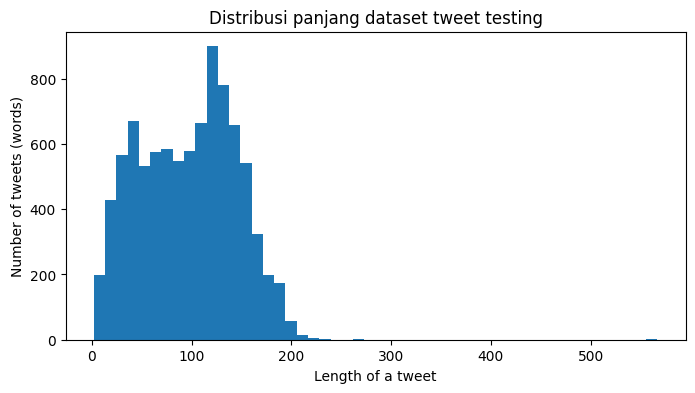

In [258]:
# visualize the distribution of the length of the tweets
plt.figure(figsize=(8, 4))
plt.hist([len(text) for text in testing_data_preprocessed['Processed Text']], bins=50)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets (words)')
plt.title('Distribusi panjang dataset tweet testing')
plt.show()


#### Frekuensi kata pada dataset testing

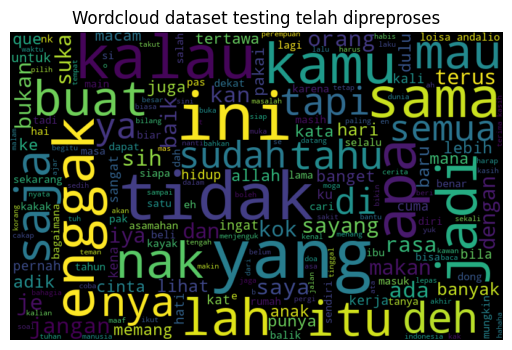

In [265]:
# Join the preprocessed text into a single string and remove single quotes
all_words = ' '.join([' '.join(text.split()).replace("'", "") for text in testing_data_preprocessed['Processed Text']])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot wordcloud
plt.figure(figsize=(8, 4))
plt.title('Wordcloud dataset testing telah dipreproses')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



### Visualisasi dari dataset Tweet Ardhito Pramono

#### Read File

In [261]:
tweet_pra_kejadian = pd.read_csv('dataset/tweet-pra-kejadian.csv', sep='delimiter', header=None)
tweet_pra_kejadian.columns = ['tweet']
tweet_pra_kejadian.head()

C:\Users\geema\AppData\Local\Temp\ipykernel_19304\2641185642.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweet_pra_kejadian = pd.read_csv('dataset/tweet-pra-kejadian.csv', sep='delimiter', header=None)


tweet
0                                                                        komen
1  Nah gini dari pada lo cuma balesin tweet gue, langsung ikutan aja kompetisi
2                                                                      iya iya
3                                                           This is awesome :)
4                                                         Sini bagi bahagianya

In [262]:
tweet_pasca_kejadian = pd.read_csv('dataset/tweet-pasca-kejadian.csv', sep='delimiter', header=None)
tweet_pasca_kejadian.columns = ['tweet']
tweet_pasca_kejadian.head()

C:\Users\geema\AppData\Local\Temp\ipykernel_19304\583978118.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweet_pasca_kejadian = pd.read_csv('dataset/tweet-pasca-kejadian.csv', sep='delimiter', header=None)


tweet
0                                 Iyaa lagi:)
1                       aku yang tidak peduli
2  RUMOR DI TWT KATANYA UDH PUNYA ANAK JUGAAA
3                   "Berdiam terlihat jomblo,
4                    Bergerak bikin melongo "

#### Preprocess tweet pra dan pasca peristiwa

In [263]:
preprocessed_tweet_pasca_kejadian = text_preprocessing(df=tweet_pasca_kejadian, slang_dict=combined_slang_dict)
preprocessed_tweet_pra_kejadian = text_preprocessing(df=tweet_pra_kejadian, slang_dict=combined_slang_dict)

Jumlah Tweet Kosong: 0
Jumlah Tweet Kosong: 0


#### Visualisasi Kata dari dataset Tweet Ardhito Pramono

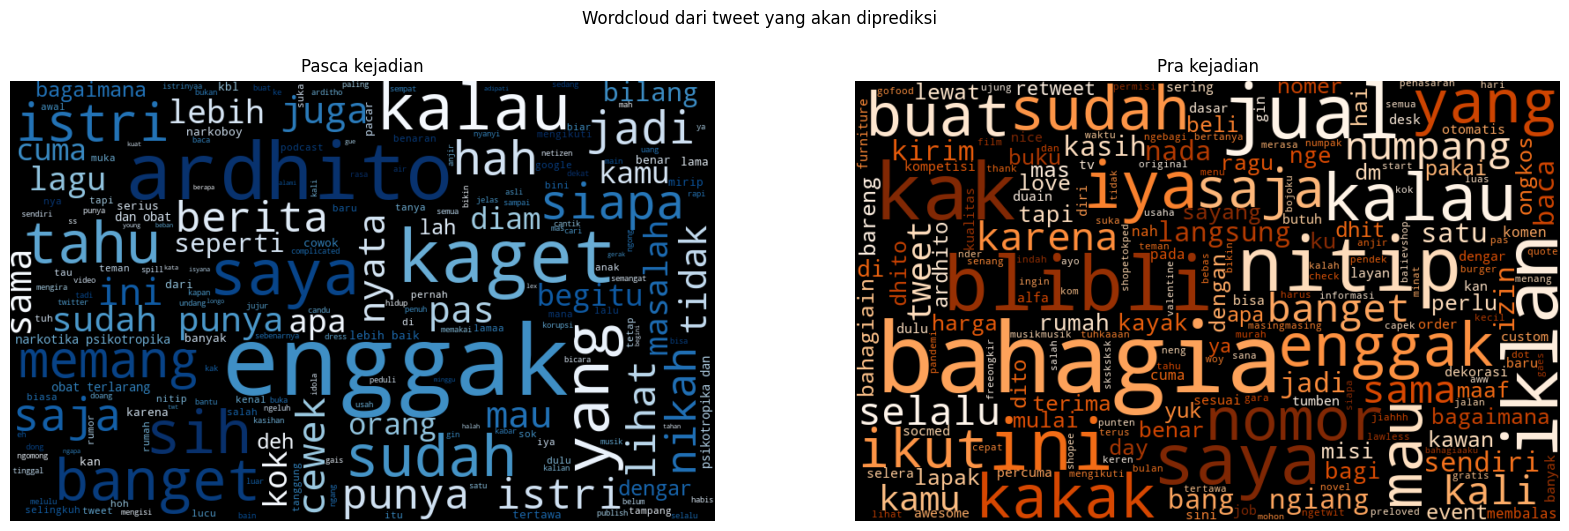

In [264]:
#wordcloud preprocessed_tweet_pasca_kejadian dan disampingnya preprocessed_tweet_pra_kejadian
all_words_preprocessed_tweet_pasca_kejadian = ' '.join([' '.join(text) for text in preprocessed_tweet_pasca_kejadian['Processed Text']])
all_words_preprocessed_tweet_pra_kejadian = ' '.join([' '.join(text) for text in preprocessed_tweet_pra_kejadian['Processed Text']])
wordcloud_preprocessed_tweet_pasca_kejadian = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Blues').generate(all_words_preprocessed_tweet_pasca_kejadian)
wordcloud_preprocessed_tweet_pra_kejadian = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='Oranges').generate(all_words_preprocessed_tweet_pra_kejadian)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Wordcloud dari tweet yang akan diprediksi')
ax1.imshow(wordcloud_preprocessed_tweet_pasca_kejadian, interpolation="bilinear")
ax1.set_title('Pasca kejadian')
ax1.axis('off')
ax2.imshow(wordcloud_preprocessed_tweet_pra_kejadian, interpolation="bilinear")
ax2.set_title('Pra kejadian')
ax2.axis('off')
plt.show()



### Frequency of words

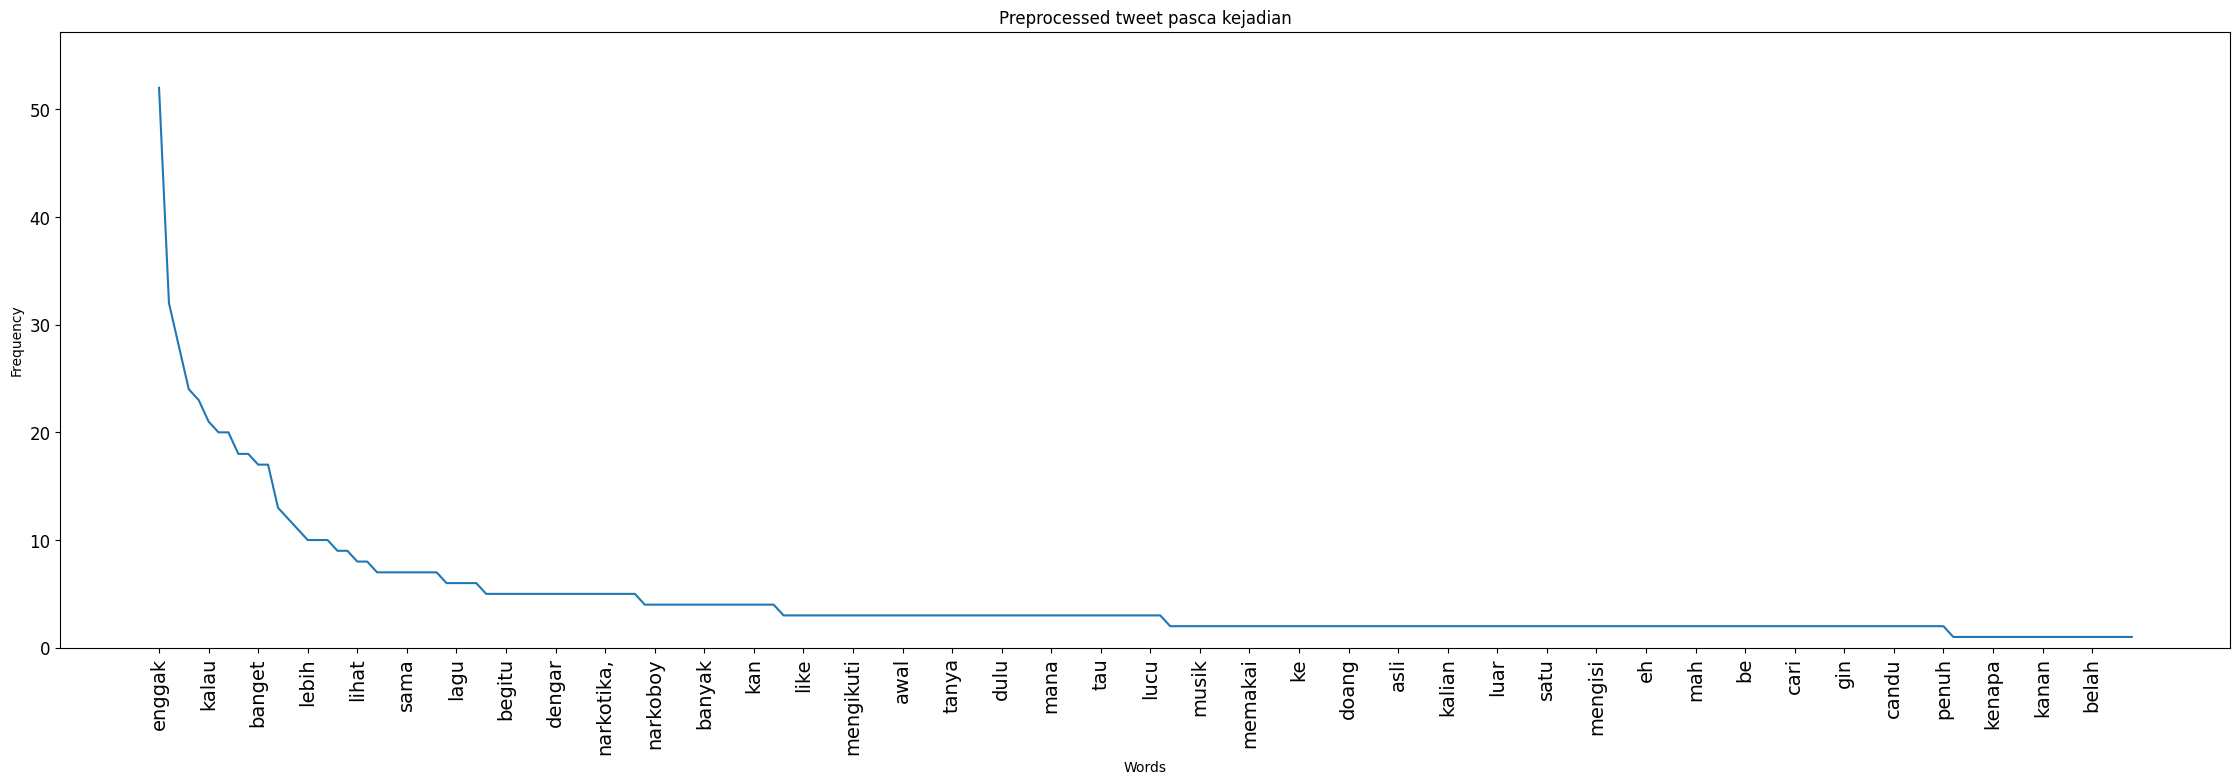

In [274]:
visualize_word_frequency_with_lines(preprocessed_tweet_pasca_kejadian['Processed Text'], num_words=200, title='Preprocessed tweet pasca kejadian')


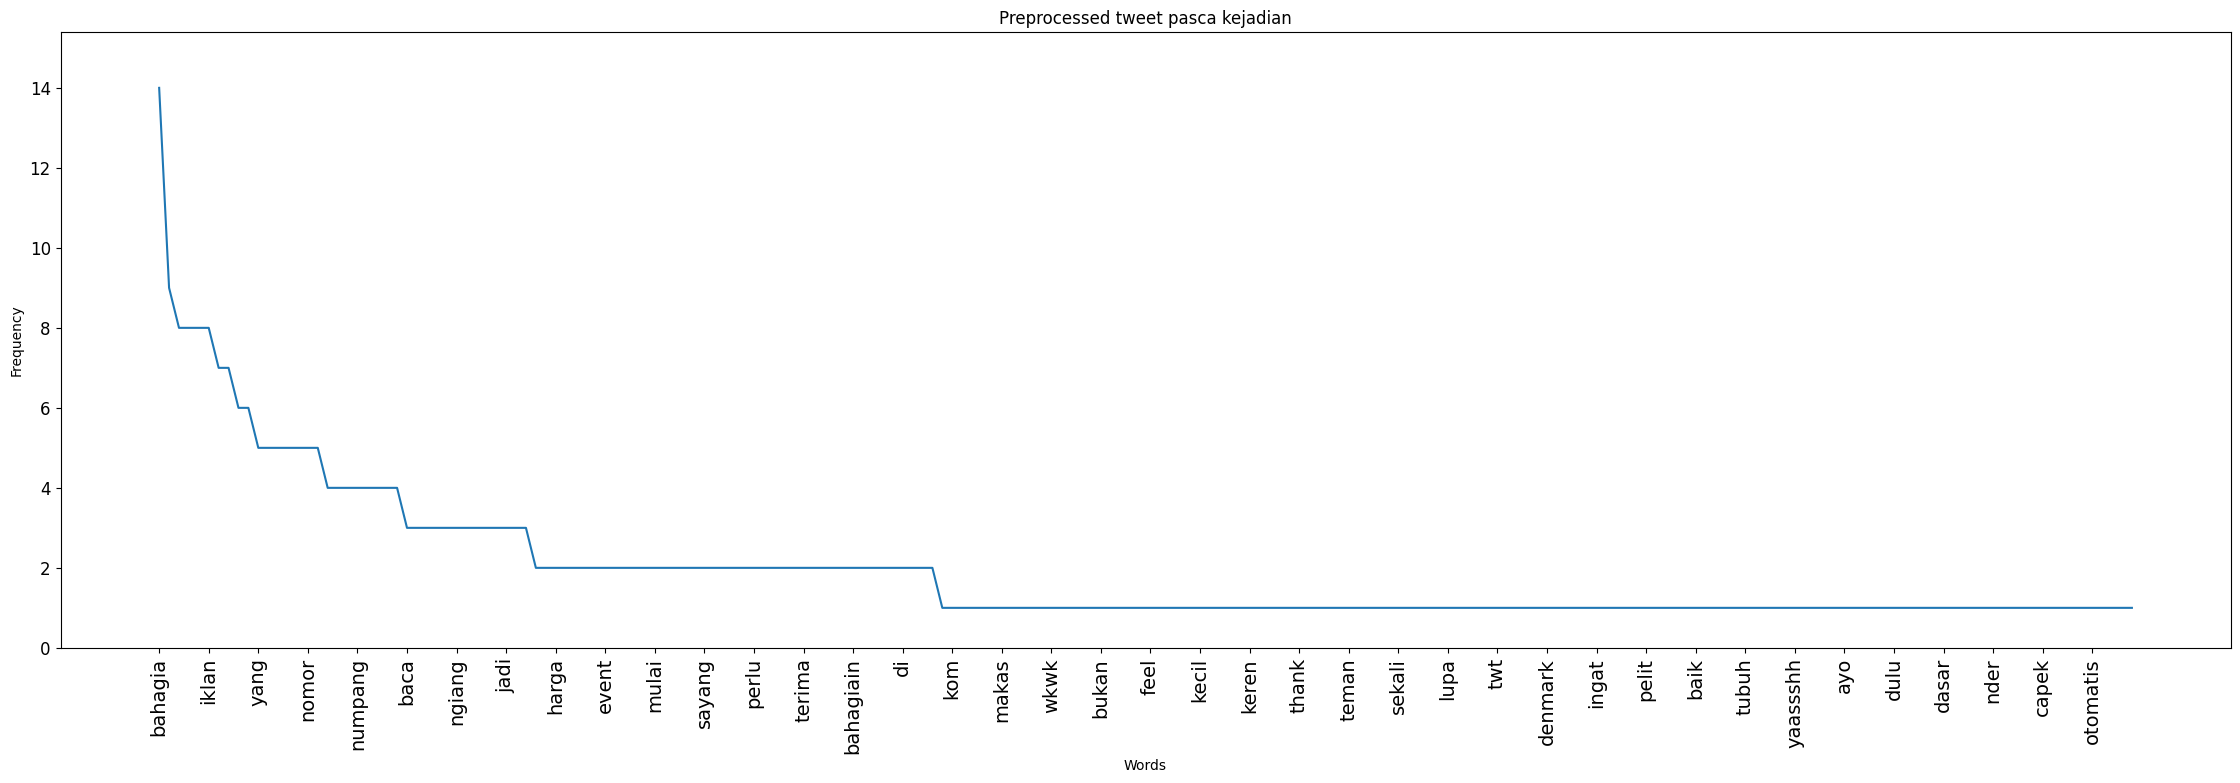

In [275]:
visualize_word_frequency_with_lines(preprocessed_tweet_pra_kejadian['Processed Text'], num_words=200, title='Preprocessed tweet pasca kejadian')


#### Simpan hasil preprocessing Tweet Ardhito Pramono

In [ ]:
#store preprocessed pra kejadian
# preprocessed_tweet_pra_kejadian.to_csv('preprocessed-data/preprocessed-tweet-pra-kejadian.csv', index=False)

#store preprocessed pasca kejadian
# preprocessed_tweet_pasca_kejadian.to_csv('preprocessed-data/preprocessed-tweet-pasca-kejadian.csv', index=False)

# Feature Extraction with TF-IDF

In [ ]:
#versi 1
training_data_preprocessed = pd.read_csv('preprocessed-data/training-data-labeled-preprocessed.csv')

vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(training_data_preprocessed)
tf_x_test = vectorizer.transform(testing_data_preprocessed)
